# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/opt/ml/dataset/train/train.csv')

In [2]:
data.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [4]:
# train data 개수
print(len(data))

32470


In [6]:
# 결측치 확인
data.isnull().sum()

id                0
sentence          0
subject_entity    0
object_entity     0
label             0
source            0
dtype: int64

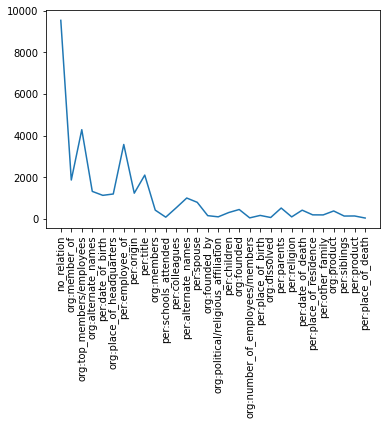

In [7]:
# label 별 개수
label_dict = {}
for i in range(len(data)):
    if data['label'][i] in label_dict:
        label_dict[data['label'][i]] += 1
    else:
        label_dict[data['label'][i]] = 1
    
plt.plot(list(label_dict.keys()), list(label_dict.values()))
plt.xticks(rotation = 90)
plt.show()

{'wikipedia': 21620, 'wikitree': 10672, 'policy_briefing': 178}


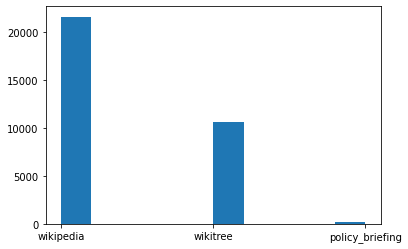

In [8]:
# source 별 개수
source_dict = {}
for i in range(len(data)):
    if data['source'][i] in source_dict:
        source_dict[data['source'][i]] += 1
    else:
        source_dict[data['source'][i]] = 1
    
plt.hist(data['source'])
print(source_dict)

In [27]:
def preprocessing_dataset(dataset):
    """ 처음 불러온 csv 파일을 원하는 형태의 DataFrame으로 변경 시켜줍니다."""
    subject_entity = []
    object_entity = []
    for k in range(len(dataset)):
        i = eval(data['subject_entity'][k])['word']
        j = eval(dataset['object_entity'][k])['word']

        subject_entity.append(i)
        object_entity.append(j)
    out_dataset = pd.DataFrame({'id':dataset['id'], 'sentence':dataset['sentence'],'subject_entity':subject_entity,'object_entity':object_entity,'label':dataset['label'],})
    return out_dataset

def tokenized(dataset):
    sen = []
    i = 0
    for e01, e02 in zip(dataset['subject_entity'], dataset['object_entity']):
        temp = ''
        temp = '[CLS] ' + e01 + ' [SEP] ' + e02 + ' [SEP]' + dataset['sentence'][i] + ' [SEP]'
        sen.append(temp)
        i += 1

    return sen

def subj_tokenized(dataset):
    sen = []
    i = 0
    for e01 in dataset['subject_entity']:
        sen.append(e01)
        i += 1
        
    return sen

def obj_tokenized(dataset):
    sen = []
    i = 0
    for e02 in dataset['object_entity']:
        sen.append(e02)
        i += 1

    return sen

In [29]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('klue/bert-base')
sen = preprocessing_dataset(data)
sentence = tokenized(sen)
subj = subj_tokenized(sen)
obj = obj_tokenized(sen)

In [30]:
sentence[0]

'[CLS] 비틀즈 [SEP] 조지 해리슨 [SEP]〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다. [SEP]'

In [31]:
print(sentence[342])
print()
print(sentence[342].split())
print()
print(tokenizer.tokenize(sentence[342]))
print()
print(len(tokenizer.tokenize(sentence[342])))

[CLS] 소련군 [SEP] 37,000명 [SEP]소련군의 포위 결과 독일군 33,000명과 헝가리군 37,000명, 시민 800,000명이 부다페스트 도시 내로 고립되었다. [SEP]

['[CLS]', '소련군', '[SEP]', '37,000명', '[SEP]소련군의', '포위', '결과', '독일군', '33,000명과', '헝가리군', '37,000명,', '시민', '800,000명이', '부다페스트', '도시', '내로', '고립되었다.', '[SEP]']

['[CLS]', '소련', '##군', '[SEP]', '37', ',', '000', '##명', '[SEP]', '소련', '##군', '##의', '포위', '결과', '독일군', '33', ',', '000', '##명', '##과', '헝가리', '##군', '37', ',', '000', '##명', ',', '시민', '800', ',', '000', '##명', '##이', '부', '##다', '##페', '##스트', '도시', '내', '##로', '고립', '##되', '##었', '##다', '.', '[SEP]']

46


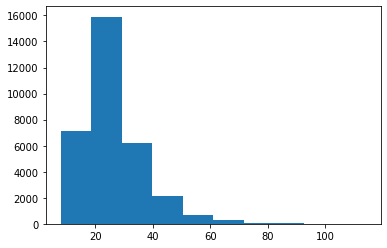

In [32]:
# 띄어쓰기 기준 max_len 분석하기
space = []
for i in range(len(sentence)):
    text = sentence[i].split()
    space.append(len(text))

plt.hist(space)
plt.show()

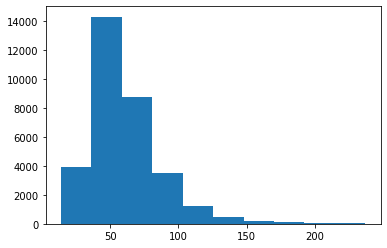

In [33]:
# tokenzier 기준 max_len 분석하기
tok = []
for i in range(len(sentence)):
    text = tokenizer.tokenize(sentence[i])
    tok.append(len(text))

plt.hist(tok)
plt.show()

In [34]:
# 모든 [UNK] token 뽑아보기
token_sum = 0
unk_token_num = 0
final_unk_lst = []
check = []
for i in range(len(sentence)):
    token_lst = tokenizer.tokenize(sentence[i])
    token_sum += len(token_lst)
    if '[UNK]' in token_lst:
        check.append(sentence[i])
    for token in token_lst:
        if token == '[UNK]':
            correct_sentence = sentence[i].replace(" ","")
            unknowned_sentence = ' '.join(tokenizer.tokenize(sentence[i])).replace(' ##', '').strip().replace(" ","")
            unk_token_num += 1
            lst = list(unknowned_sentence.split("[UNK]"))
            lst = ' '.join(lst).split()
            for j in lst:
                correct_sentence = correct_sentence.replace(j," ",1).strip()
            unk_lst = list(correct_sentence.split(" "))
            for unk_word in unk_lst:
                if unk_word not in final_unk_lst:
                    final_unk_lst.append(unk_word)
print("총 토큰 수 :",token_sum)
print("[UNK] 토큰 수 :",unk_token_num)
print("중복을 제외한 [UNK] 토큰 수 :",len(final_unk_lst)) 
print(final_unk_lst)

총 토큰 수 : 1966771
[UNK] 토큰 수 : 6953
중복을 제외한 [UNK] 토큰 수 : 2639
['容旿', '바라캇', '↔', '犬', '鶴', '康', 'Águias', '少弐', '少弐頼尚', '陞', '興植', '킵차크', '劉', '宏', '勝', '거뒸을', '泳孝', '申宜', '두샨베', '夏侯', '夏侯惇', '曹騰', '侍', '僉', '樞', '進礪', '–', '薛', '儉', '슌', '슌은', '盧景', '뭍혀잇는', '리셴녠', '崔翰', '徐', '錫', '玉置浩', '坂', '哲秀', '인트라팃과', '放送總局', '季', '홋스퍼', '홋스퍼의', 'Трбайх', '讓寧', '柳', '洙', '檢察廳', '爵', '李直閣', '雇', '사르키샨', '흄', '€1천', '켐페스', '켐페스에다가', '愼', '齋', '린뱌오', '린뱌오는', '쑨원이나', '条', '今', '노르드스트룀과', '慎', 'くうかい홍법', '쟝쩐위', '쟝쩐위는', '冉', '獻誠', 'Società', '펭수', '復鎭', 'ΚυριάκοςΠαπαδόπουλος', '넋업샨', '넋업샨는', '池承珉', '€21M에', '李御寧', '忍菴', '라디오셱의', '崔圭', '秋', '克', '池', '革', '樂', '興慶', '尉', '藎', '킵루츠', '臺', '延興', '展', '켐니츠', '켐니츠를', '켐니츠와켐니츠', '梁敞涉', '宋', '敏', '農', 'بدیعالزمان', '촐로', '€17', '馮玉祥', '閻錫', '飮葛', 'Ⓐ에', '리콴유', '리콴유는', '趙錫俊', '푈러', 'Völler', '浦項', '廳', '麗', '梁', '楊', '兌卿', '雄', 'Ângelo', 'Vítor', '隊', '育訓鍊團', '靖', '錦', '李瑜', '콴', '鬱', '蕭昭', '藥局', '校', '堯莢', '李', '淵', '李顥', '謙', '운터하힝의', '敬', '鎭碩', '喜', '薛烏儒', '屋骨

In [35]:
# subject_entity [UNK] token 뽑아보기
token_sum = 0
unk_token_num = 0
final_unk_lst = []
check = []
for i in range(len(subj)):
    token_lst = tokenizer.tokenize(subj[i])
    token_sum += len(token_lst)
    if '[UNK]' in token_lst:
        check.append(subj[i])
    for token in token_lst:
        if token == '[UNK]':
            correct_sentence = subj[i].replace(" ","")
            unknowned_sentence = ' '.join(tokenizer.tokenize(subj[i])).replace(' ##', '').strip().replace(" ","")
            unk_token_num += 1
            lst = list(unknowned_sentence.split("[UNK]"))
            lst = ' '.join(lst).split()
            for j in lst:
                correct_sentence = correct_sentence.replace(j," ",1).strip()
            unk_lst = list(correct_sentence.split(" "))
            for unk_word in unk_lst:
                if unk_word not in final_unk_lst:
                    final_unk_lst.append(unk_word)
print("총 토큰 수 :",token_sum)
print("[UNK] 토큰 수 :",unk_token_num)
print("중복을 제외한 [UNK] 토큰 수 :",len(final_unk_lst)) 
print(final_unk_lst)

총 토큰 수 : 95399
[UNK] 토큰 수 : 224
중복을 제외한 [UNK] 토큰 수 : 119
['바라캇', '슌', '리셴녠', '사르키샨', '흄', '켐페스', '쟝쩐위', '넋업샨', '킵루츠', '리콴유', '푈러', '뮐러', '홋카이도', '피녜라', 'MŠK', '훙윈', '로뮈알', '넵투누스', '푸르트벵글러', '비욘세', '리옌훙', '베렝가리오', '에스파뇰', '루쳄부르스키', '꽈드로스', '래이쾨넨', '로퀜스', '뱌체슬라프', '쥘', '숀', '포로셴코', '스웜', '헹크', '칸쟈니∞', '긱스', '스뱌토폴크', '메이헴', '쥰', '욘', '방얏', '핌', '카뮈', '쾰른', '뢴트겐', '묀헨글라트바흐', '헴스워스', '아뎀', '홋스퍼', '체르노젬스키', '로코솝스키', '귈', '슈쳉스니', '옝제이치크', '푀', '엡손', '힉스', '옝제이차크', '다롄', '뮈르달', '우젠슝', '쿠틉', '하이츨러', '위키트리뷴', '뵐플리', '야쿱', '킵', '젭', '아믈리브', '로바쳅스키', '호엔촐레른지크마링겐', '헹', '카녜이', '웸블리', '昶', '위쾨넨', '쑹타오', '횃불트리니티신학대학원대학교', '퓌르트', '펍메드', '파스콸', '맬', '젬베콜라', '아르툠', 'RÚV', '퍼퓸', '믈라덴', '뵘', '마촐라', '펩', '또똣', '슌지', '뉘스트룀', '채드윅', '와치랄롱꼰', '벵갈루루', '화뤄겅', '放送', '보아텡', '옙투셴코', '자캅카스', '똔텃투옛', '루넝', '욘케레', '이바녜스', '앳킨슨', '콴', '킵초게', '브뢴뷔', '에미넴', '뎁스', '쾨벤하운', '켐프', '귀츨라프', '가믈랭', '킵차크', '콸리아렐라', '리셴룽', '킵식스', '핼리팩스']


In [36]:
# object_entity [UNK] token 뽑아보기
token_sum = 0
unk_token_num = 0
final_unk_lst = []
check = []
for i in range(len(obj)):
    token_lst = tokenizer.tokenize(obj[i])
    token_sum += len(token_lst)
    if '[UNK]' in token_lst:
        check.append(obj[i])
    for token in token_lst:
        if token == '[UNK]':
            correct_sentence = obj[i].replace(" ","")
            unknowned_sentence = ' '.join(tokenizer.tokenize(obj[i])).replace(' ##', '').strip().replace(" ","")
            unk_token_num += 1
            lst = list(unknowned_sentence.split("[UNK]"))
            lst = ' '.join(lst).split()
            for j in lst:
                correct_sentence = correct_sentence.replace(j," ",1).strip()
            unk_lst = list(correct_sentence.split(" "))
            for unk_word in unk_lst:
                if unk_word not in final_unk_lst:
                    final_unk_lst.append(unk_word)
print("총 토큰 수 :",token_sum)
print("[UNK] 토큰 수 :",unk_token_num)
print("중복을 제외한 [UNK] 토큰 수 :",len(final_unk_lst)) 
print(final_unk_lst)

총 토큰 수 : 86866
[UNK] 토큰 수 : 416
중복을 제외한 [UNK] 토큰 수 : 227
['少弐', '玉置浩', '放送總局', '홋스퍼', '린뱌오', '条', '켐니츠', 'Müller', '園', '伊達', '뎁', '숲튽훈', '–', '国际', 'よみ', 'Ⓐ', 'みゆき', '쾰른', '쿰엔터테인먼트', '리숀레지온', '恒', '克孝', '稅廳', '会', 'アニメーションドゥウ', 'française', '樹', '아녜스', '陵', '昌', '쾰른의', '郭', '驥', '清', '策研', 'Ibišević', '居', '干', '량훙즈', '에스파뇰', 'あゆみ', '李永', '梁啓超', '衛', '諮', '에미넴', '아둔야뎃', '乃', 'Hoeneß', '홋카이도', 'SašaDrakulić', '崔彰', '브뢴뷔', 'たなか', '와치랄롱꼰', 'Päffgen', '盧塢', '히엡호아', '森喜朗', '蔚', '放送', '훙위안', 'García', '젬스키', '쓰촨', '句麗', '衛右渠', '監', '하이뎬구', '뎀나', '俊', '360°', '스뱌토폴크', '藤', '힉스', '세묜티모셴코', '沸流', '晋', '放送局', '冽巖', '魚藻', '降', '竹内', '宥', '막찐쭝', '슌지', '宋', '飮葛', 'いけだ', '釋迦牟尼', 'Wölfli', '인트라팃', '渤', '織', '李懌', 'Vidošić', '웡', '鈴', '貫', '郎', '計廳', '昌謨', '奧', '緖', '화뤄겅', 'ルールー', 'アムール', '穆', '后', '洋', '佐々', '莉佳', '畿放送', 'さあや', '麗', '李承', '宣', '從功', '젭', '숀', '핼리팩스', '端', '裕介', 'Víctor', '崇', '技術', '育', '校', '點仙', '徳', '洪熙', '뱌체슬라프', '順興', '烈', '李娥珠', 'Vastić', 'Südtirol', '豊', '洪景', '尹鍾', '蔡', '煦',

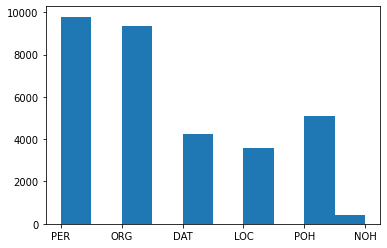

In [38]:
# object_entity의 type 살펴보기
obj_type = []
for i in range(len(data)):
    obj_type.append(eval(data['object_entity'][i])['type'])

plt.hist(obj_type)
plt.show()

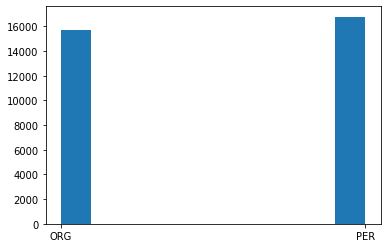

In [39]:
# subject_entity의 type 살펴보기
subj_type = []
for i in range(len(data)):
    subj_type.append(eval(data['subject_entity'][i])['type'])

plt.hist(subj_type)
plt.show()

In [55]:
# train data에 존재하는 모든 특수기호 리스트
import re

s = []
for k in range(len(data)):
    i = eval(data['subject_entity'][k])['word']
    j = eval(data['object_entity'][k])['word']
    temp = i + ' ' + j + ' ' + data['sentence'][k]
    s.append(temp)
    
special = []
for i in s:
    text = re.sub(r'[\w+\s]', '', i)
    for j in text:
        if j not in special:
            special.append(j)
print(special)

['〈', '〉', '《', '》', '.', '·', '(', ')', '‘', '’', ':', ',', '~', "'", '-', '“', '”', '"', '㈜', '‧', '↔', '▲', '%', '/', '&', '!', '–', ';', '=', '→', '€', '△', '*', '｢', '｣', '★', '>', '․', '「', '」', '・', 'Ⓐ', '•', '☎', '[', ']', '㎞', '☆', '`', '※', '|', '『', '』', '。', '˘', '，', '＇', '∼', '㎡', '́', '：', '⸱', '∞', '♥', '･', '⋅', '⟪', '⟫', '～', '£', '{', '}', '°', '˹', '˼', '▴', '℃', '㎏', '（', '）', '∙', '♡', '$', '㎖', '≪', '≫', '□', '·', '\u200e', '☏', '⁺', '®', '、', '？', '―', '○', '／', '़', 'ी', 'ु', '्', 'ा', '㈔', '▵', '«', '»', '×', '—', '％', '′', '₫', '<', '㎜', '\uf09e', '㎿', '⌜', '⌟']


In [58]:
# [UNK] token으로 된 특수기호 리스트
unk_sepcial = []
for i in range(len(special)):
    if '[UNK]' in tokenizer.tokenize(special[i]):
        unk_sepcial.append(special[i])
print(unk_sepcial)

['↔', '–', '€', 'Ⓐ', '☎', '。', '˘', '＇', '́', '⸱', '∞', '･', '⋅', '⟪', '⟫', '～', '£', '°', '˹', '˼', '▴', '（', '）', '·', '☏', '⁺', '®', '、', '？', '／', '़', 'ी', 'ु', '्', 'ा', '㈔', '▵', '«', '»', '′', '₫', '㎿', '⌜', '⌟']


In [62]:
# 완전히 중복되는 문장 찾기
repeat = data[data[['sentence', 'subject_entity', 'object_entity', 'label', 'source']].duplicated(keep=False)].sort_values('sentence')
repeat

,id,sentence,subject_entity,object_entity,label,source
22090,22090,"1959-60 시즌 이후의 알파 에트니키 / 수페르리가 엘라다, 그리스 컵, 그리고...","{'word': '수페르리가 엘라다', 'start_idx': 25, 'end_id...","{'word': '그리스', 'start_idx': 36, 'end_idx': 38...",no_relation,wikipedia
9618,9618,"1959-60 시즌 이후의 알파 에트니키 / 수페르리가 엘라다, 그리스 컵, 그리고...","{'word': '수페르리가 엘라다', 'start_idx': 25, 'end_id...","{'word': '그리스', 'start_idx': 36, 'end_idx': 38...",no_relation,wikipedia
25368,25368,2001년 4월 민주국민당 김윤환 의원과 민주당 의원 사이의 정책 연합과 관련한 통...,"{'word': '민주국민당', 'start_idx': 9, 'end_idx': 1...","{'word': '민주당', 'start_idx': 23, 'end_idx': 25...",no_relation,wikipedia
2500,2500,2001년 4월 민주국민당 김윤환 의원과 민주당 의원 사이의 정책 연합과 관련한 통...,"{'word': '민주국민당', 'start_idx': 9, 'end_idx': 1...","{'word': '민주당', 'start_idx': 23, 'end_idx': 25...",no_relation,wikipedia
3547,3547,2010년 10월 15일 전라북도청을 방문한 맹형규 행정안전부 장관은 도내 지자체간...,"{'word': '전라북도청', 'start_idx': 14, 'end_idx': ...","{'word': '행정안전부', 'start_idx': 29, 'end_idx': ...",no_relation,wikipedia
...,...,...,...,...,...,...
27325,27325,펀치넬로는 10cm의 권정열이 피처링으로 참여한 '미안해서 미안해'로 무대에 올랐다.,"{'word': '권정열', 'start_idx': 12, 'end_idx': 14...","{'word': '10cm', 'start_idx': 6, 'end_idx': 9,...",per:employee_of,wikitree
14658,14658,함연지는 함영준 오뚜기 회장의 장녀다.,"{'word': '오뚜기', 'start_idx': 9, 'end_idx': 11,...","{'word': '함영준', 'start_idx': 5, 'end_idx': 7, ...",org:top_members/employees,wikitree
6936,6936,함연지는 함영준 오뚜기 회장의 장녀다.,"{'word': '오뚜기', 'start_idx': 9, 'end_idx': 11,...","{'word': '함영준', 'start_idx': 5, 'end_idx': 7, ...",org:top_members/employees,wikitree
20898,20898,화려한 재기를 뒤로하고 고(故) 안재환에게 돈을 빌려줬다는 루머로 마음고생을 하던 ...,"{'word': '최진실', 'start_idx': 46, 'end_idx': 48...","{'word': '2008년 10월 2일', 'start_idx': 51, 'end...",per:date_of_death,wikitree
